In [96]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
assembly_data = pd.read_csv('transposed_report.tsv', sep='\t')

In [3]:
assembly_data['k'] = assembly_data['Assembly'].apply(lambda x: x.split('_')[0][1:])

In [4]:
assembly_data['coverage'] = assembly_data['Assembly'].apply(lambda x: x.split('_')[2][:len(x.split('_')[2])-1])

In [5]:
assembly_data['fragment_length'] = assembly_data['Assembly'].apply(lambda x: 600 if '600m' in x else 200)

In [6]:
reads = assembly_data['Assembly'].apply(lambda x: x.strip('-contigs'))

In [7]:
assembly_data.index = pd.DataFrame(index=reads).index

In [8]:
assembly_data

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,NGA50,NA75,NGA75,LA50,LGA50,LA75,LGA75,k,coverage,fragment_length
Assembly,,,,,,,,,,,,,,,,,,,,,
k30_ecoli_100X_1,k30_ecoli_100X_1-contigs,574,149,111,96,57,27,4600795,4559642,4456040,...,57958,33607,31903,21,22,47,49,30,100,200
k36_ecoli_100X_1,k36_ecoli_100X_1-contigs,435,129,101,83,54,32,4607285,4569436,4494389,...,73690,42312,42262,19,20,40,41,36,100,200
k42_ecoli_100X_1,k42_ecoli_100X_1-contigs,376,119,91,81,57,31,4617624,4586981,4510894,...,82877,42318,42262,18,18,38,39,42,100,200
k48_ecoli_100X_1,k48_ecoli_100X_1-contigs,339,109,88,77,54,30,4621162,4591434,4533092,...,95861,44790,42324,16,17,35,36,48,100,200
k54_ecoli_100X_1,k54_ecoli_100X_1-contigs,295,103,85,74,53,32,4623081,4595244,4546923,...,95906,48889,48252,16,17,33,34,54,100,200
k60_ecoli_100X_1,k60_ecoli_100X_1-contigs,284,98,80,69,51,32,4628369,4599433,4550881,...,106366,53796,53764,15,15,31,32,60,100,200
k66_ecoli_100X_1,k66_ecoli_100X_1-contigs,264,97,78,68,51,32,4628447,4599865,4547044,...,106378,53927,53927,15,15,31,31,66,100,200
k72_ecoli_100X_1,k72_ecoli_100X_1-contigs,257,92,74,64,50,31,4634937,4604631,4551776,...,112701,58833,58833,14,15,29,29,72,100,200
k78_ecoli_100X_1,k78_ecoli_100X_1-contigs,242,90,74,65,51,32,4634528,4604129,4556604,...,106402,58833,58233,14,15,29,30,78,100,200


# gather all ntcard data

In [9]:
root = '/projects/btl/eerhan/simulated_data/ecoli'
#files = ['freq_k128.hist', 'freq_k32.hist', 'freq_k42.hist', 'freq_k54.hist', 'freq_k64.hist', 'freq_k72.hist', 'freq_k84.hist', 'freq_k96.hist',
#'freq_k30.hist', 'freq_k36.hist', 'freq_k48.hist', 'freq_k60.hist', 'freq_k66.hist', 'freq_k78.hist', 'freq_k90.hist']
ntcard_data = pd.DataFrame(dtype=np.float64)
for read in reads:
    read_dir = read[4:]
    k = read[:3]
    ntcard_path = "{}/{}/ntcard/freq_{}.hist".format(root, read_dir, k)
    temp = pd.read_csv(ntcard_path, sep='\t', index_col=0, header=None, names=["{}_{}".format(k, read_dir)])
    ntcard_data["{}_{}".format(k, read_dir)] = temp["{}_{}".format(k, read_dir)]

In [10]:
ntcard_data = ntcard_data.T

In [11]:
ntcard_data.index

Index([u'k30_ecoli_100X_1', u'k36_ecoli_100X_1', u'k42_ecoli_100X_1',
       u'k48_ecoli_100X_1', u'k54_ecoli_100X_1', u'k60_ecoli_100X_1',
       u'k66_ecoli_100X_1', u'k72_ecoli_100X_1', u'k78_ecoli_100X_1',
       u'k84_ecoli_100X_1',
       ...
       u'k42_ecoli_50X_600m_9', u'k48_ecoli_50X_600m_9',
       u'k54_ecoli_50X_600m_9', u'k60_ecoli_50X_600m_9',
       u'k66_ecoli_50X_600m_9', u'k72_ecoli_50X_600m_9',
       u'k78_ecoli_50X_600m_9', u'k84_ecoli_50X_600m_9',
       u'k90_ecoli_50X_600m_9', u'k96_ecoli_50X_600m_9'],
      dtype='object', length=1260)

In [12]:
all_data = pd.concat([assembly_data, ntcard_data], axis=1)

In [13]:
# Estimate genome size
all_data['F0-f1'] = all_data['F0'] - all_data['f1']

In [14]:
# Define good assemblies
threshold = np.percentile(all_data['NGA50'], 90)
all_data['good_quality'] = all_data['NGA50'].apply(lambda x: True if x > threshold else False)

# Machine learning

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [17]:
partial_data = all_data[all_data['fragment_length'] == 600]
X = pd.concat([partial_data.loc[:, 'F1':'f300'], partial_data[['F0-f1', 'coverage']]], axis=1)
y = partial_data['good_quality']

In [60]:
partial_data

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,f293,f294,f295,f296,f297,f298,f299,f300,F0-f1,good_quality
Assembly,,,,,,,,,,,,,,,,,,,,,
k30_ecoli_100X_600m_1,k30_ecoli_100X_600m_1-contigs,308,80,65,59,50,29,4635741,4616425,4571584,...,64,192,63,0,0,64,128,63,5903307,False
k36_ecoli_100X_600m_1,k36_ecoli_100X_600m_1-contigs,235,71,59,53,46,28,4644579,4627410,4590610,...,0,64,0,0,0,0,0,0,5900679,False
k42_ecoli_100X_600m_1,k42_ecoli_100X_600m_1-contigs,172,62,54,50,44,28,4639473,4625327,4599099,...,64,0,0,0,0,0,0,0,5891119,True
k48_ecoli_100X_600m_1,k48_ecoli_100X_600m_1-contigs,162,65,56,51,44,28,4636774,4622734,4597786,...,0,0,0,0,64,0,0,64,5800321,False
k54_ecoli_100X_600m_1,k54_ecoli_100X_600m_1-contigs,134,64,57,51,44,28,4640985,4630244,4611646,...,0,0,0,64,64,64,64,64,5759380,False
k60_ecoli_100X_600m_1,k60_ecoli_100X_600m_1-contigs,136,64,57,51,44,28,4643193,4630570,4611748,...,128,0,0,64,192,63,0,64,5687092,False
k66_ecoli_100X_600m_1,k66_ecoli_100X_600m_1-contigs,131,66,57,51,44,28,4645052,4632595,4608678,...,192,192,192,192,0,192,0,64,5643003,False
k72_ecoli_100X_600m_1,k72_ecoli_100X_600m_1-contigs,128,63,56,50,43,27,4645470,4632466,4609955,...,63,64,64,0,0,0,128,128,5637833,False
k78_ecoli_100X_600m_1,k78_ecoli_100X_600m_1-contigs,129,64,56,50,44,28,4644877,4631297,4608715,...,0,0,0,0,0,0,0,0,5567328,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Logistic regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.score(X_test, y_test)

In [ ]:
y[y]

In [ ]:
len(y)

In [ ]:
y_test[log_reg.predict(X_test)]

Lasso and ElasticNet regression

In [114]:
y = partial_data['NGA50']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [116]:
lasso_model = Lasso(alpha=0.1, max_iter=10000)

In [117]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
lasso_model.score(X_test, y_test)

-0.39678161905509524

In [119]:
elastic_model = ElasticNet(alpha=0.01)

In [120]:
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
elastic_model.score(X_test, y_test)

0.281944837278577

Random Forest Regression

In [122]:
rfr_model = RandomForestRegressor(n_estimators=100, n_jobs=32, max_features='log2')

In [123]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=32,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
rfr_model.score(X_test, y_test)

0.59435703192386691

In [125]:
gfr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')

In [126]:
gfr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [127]:
gfr_model.score(X_test, y_test)

0.58122415907308689

In [128]:
import matplotlib.pyplot as plt

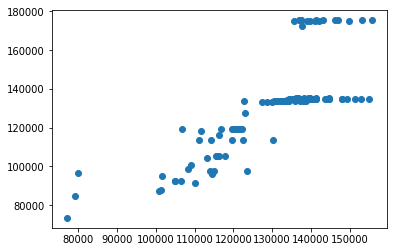

In [129]:
plt.scatter(rfr_model.predict(X_test), y_test)
plt.show()

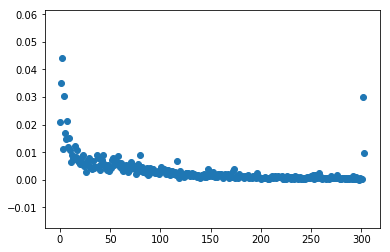

In [130]:
y_pos = np.arange(len(rfr_model.feature_importances_))
plt.scatter(y_pos, rfr_model.feature_importances_)
#plt.bar(y_pos, rfr_model.feature_importances_, align='center', alpha=0.5, tick_label=X.columns.values)
plt.show()

In [78]:
len(X.columns.values)

304

In [131]:
rfr_model.feature_importances_[rfr_model.feature_importances_ >0.05]

array([], dtype=float64)

In [132]:
X.columns.values[rfr_model.feature_importances_ >0.02]

array(['F1', 'F0', 'f1', 'f3', 'f6', 'F0-f1'], dtype=object)

Support Vector Regression and Ridge Regression

In [86]:
from sklearn.kernel_approximation import Nystroem

In [90]:
#svr_nystroem_model = Pipeline(steps=[('Nystroem', Nystroem(kernel='linear')), ('svr', LinearSVR(C=1.0))])

In [91]:
#svr_nystroem_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Nystroem', Nystroem(coef0=None, degree=None, gamma=None, kernel='linear',
     kernel_params=None, n_components=100, random_state=None)), ('svr', LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [94]:
#svr_nystroem_model.score(X_test, y_test)

-24.787437621298533

In [105]:
#r2_score(svr_nystroem_model.predict(X_test), y_test)

-0.84409582331310418

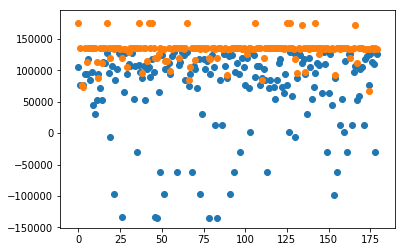

In [112]:
#plt.scatter(range(0,len(X_test)), svr_nystroem_model.predict(X_test))
#plt.scatter(range(0,len(X_test)), y_test)

#plt.show()

In [113]:
y_test

Assembly
k84_ecoli_200X_600m_13    175451
k42_ecoli_50X_600m_12     135136
k96_ecoli_20X_600m_1       76831
k96_ecoli_20X_600m_13      73415
k54_ecoli_50X_600m_8      135012
k36_ecoli_20X_600m_14     113398
k90_ecoli_200X_600m_14    135012
k48_ecoli_50X_600m_6      135012
k72_ecoli_100X_600m_15    135012
k48_ecoli_100X_600m_12    135012
k60_ecoli_200X_600m_8     135012
k30_ecoli_50X_600m_2      113707
k90_ecoli_20X_600m_11      87970
k60_ecoli_100X_600m_12    135012
k30_ecoli_50X_600m_15     110831
k78_ecoli_50X_600m_12     135012
k78_ecoli_50X_600m_9      135012
k90_ecoli_100X_600m_15    175457
k72_ecoli_100X_600m_12    135012
k30_ecoli_100X_600m_10    119416
k66_ecoli_50X_600m_11     135012
k36_ecoli_200X_600m_11    134105
k48_ecoli_50X_600m_3      135012
k60_ecoli_50X_600m_7      135012
k90_ecoli_100X_600m_14    135012
k66_ecoli_20X_600m_2      133733
k30_ecoli_200X_600m_8     119416
k36_ecoli_50X_600m_3      133574
k66_ecoli_20X_600m_12     133528
k36_ecoli_20X_600m_11     104590
 

In [133]:
svr_model = SVR(C=1.0, kernel='linear')

In [ ]:
svr_model.fit(X_train, y_train)

In [ ]:
svr_model.score(X_test, y_test)

In [ ]:
ridge_model = Ridge(alpha=0.01)

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
ridge_model.score(X_test, y_test)

In [ ]:
print "test"

,F1,F0,f1,f2,f3,f4,f5,f6,f7,f8,...,f293,f294,f295,f296,f297,f298,f299,f300,F0-f1,coverage
Assembly,,,,,,,,,,,,,,,,,,,,,
k54_ecoli_200X_600m_11,600313600,95103646,85930568,4386175,210411,15836,2628,302,61,0,...,64,0,64,64,64,0,64,128,9173078,200
k90_ecoli_50X_600m_8,94379200,27752836,22956734,211267,2723,2751,7368,16336,38760,77833,...,0,0,0,0,0,0,0,0,4796102,50
k90_ecoli_200X_600m_10,377516800,94800342,87149462,2941575,116952,8254,900,250,1,0,...,64,0,64,64,0,64,128,0,7650880,200
k90_ecoli_200X_600m_1,377516800,94942244,87282818,2951864,115589,8065,837,122,0,0,...,0,0,64,0,64,128,0,64,7659426,200
k90_ecoli_50X_600m_2,94379200,27704310,22918208,201190,2224,2431,8073,18194,38950,76487,...,0,0,0,0,0,0,0,0,4786102,50
k30_ecoli_100X_600m_6,374422400,38862418,32975372,1262541,52272,4212,308,191,0,64,...,0,128,0,128,0,0,128,0,5887046,100
k30_ecoli_100X_600m_9,374422400,38886536,32967400,1296555,51565,2864,567,1,64,64,...,0,64,0,0,0,64,192,127,5919136,100
k90_ecoli_20X_600m_12,37751680,13895345,9352648,217792,379451,598868,714551,730814,650602,480895,...,0,0,0,0,0,0,0,0,4542697,20
k84_ecoli_50X_600m_13,103662400,28421448,23626766,220689,2702,892,1729,5574,14480,29725,...,0,0,0,0,0,0,0,0,4794682,50
